<a href="https://colab.research.google.com/github/Manasapothakamuru/IdentifyingDuplicateQuestions/blob/main/newDbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
nltk.download('punkt')

df = pd.read_csv('samplequestionsData.csv')

text_column_name = df.columns[0]
text_data = df[text_column_name]

tokenized_text = text_data.apply(nltk.word_tokenize)

word2vec_model = Word2Vec(tokenized_text, vector_size=90, min_count=1)

numerical_vectors = []
for tokens in tokenized_text:
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        numerical_vectors.append(sum(vectors) / len(vectors))
    else:
        numerical_vectors.append([0] * word2vec_model.vector_size)
numeric_df = pd.DataFrame(numerical_vectors)
#display(numeric_df)
numeric_df.to_csv('numericalValues.csv', index=False)

numericalValues_df = pd.read_csv('numericalValues.csv')
print(numericalValues_df.shape)
'''
X = numericalValues_df.iloc[:, 0:10]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
'''



(40, 90)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"\nX = numericalValues_df.iloc[:, 0:10]\n\ntsne = TSNE(n_components=2, random_state=42)\nX_tsne = tsne.fit_transform(X)\nplt.scatter(X_tsne[:, 0], X_tsne[:, 1])\nplt.title('t-SNE Visualization')\nplt.xlabel('Dimension 1')\nplt.ylabel('Dimension 2')\nplt.show()\n"

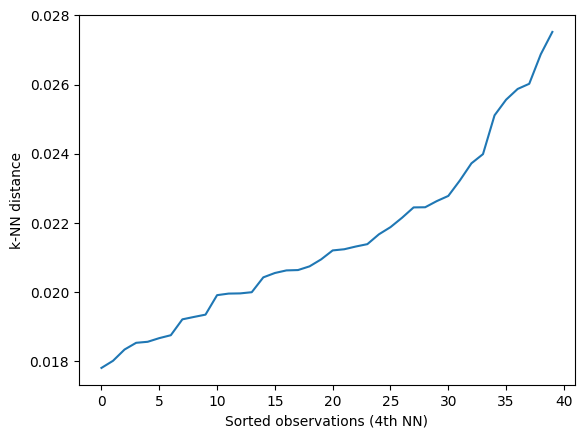

In [121]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df = pd.read_csv('numericalValues.csv')
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
neigh_dist, neigh_ind = nbrs.kneighbors(df)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


In [122]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.025873089179748336


In [37]:
pip install kneed

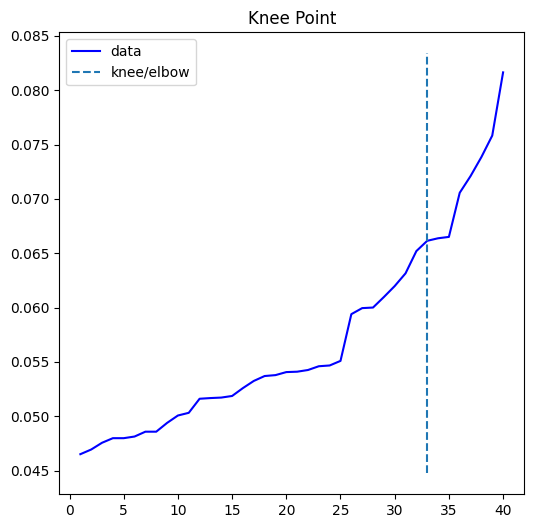

In [68]:
kneedle.plot_knee()
plt.show()

In [123]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 0.02, min_samples = 1).fit(numericalValues_df)
# get cluster labels
clusters.labels_
set(clusters.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [124]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 1,
         1: 20,
         2: 1,
         3: 6,
         4: 1,
         5: 1,
         6: 1,
         7: 3,
         8: 1,
         9: 1,
         10: 1,
         11: 1,
         12: 1,
         13: 1})

In [128]:
print("hello")

hello
